In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x, x_points=None, y_points=None):
    if x_points is None or y_points is None:
        x_points = np.array([-1, -0.3, -0.2, -0.1, 0.0, 0.2, 0.4, 1])
        y_points = np.array([1.0, 1.0, 0.0, 1, 1, 0.5, 1, 1])
    return np.interp(x, x_points, y_points)

def randomized_smoothing(x, sigma=0.1, mu=1, num_samples=1000):
    '''Randomized smoothing of the function f(x)'''
    smoothed_values = []
    oise = np.random.normal(0, sigma, size=x.shape)
    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, size=x.shape)
        smoothed_values.append(f(x + mu*noise))
    return np.mean(smoothed_values, axis=0)

def lse_smoothing(x, sigma=0.1, lam = 1, mu=1, num_samples=1000):
    '''Log-sum-exp smoothing of the function f(x)'''
    smoothed_values = []
    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, size=x.shape)
        smoothed_values.append(np.exp(-1/lam * f(x + mu*noise)))
    return -lam * np.log(np.mean(smoothed_values, axis=0))

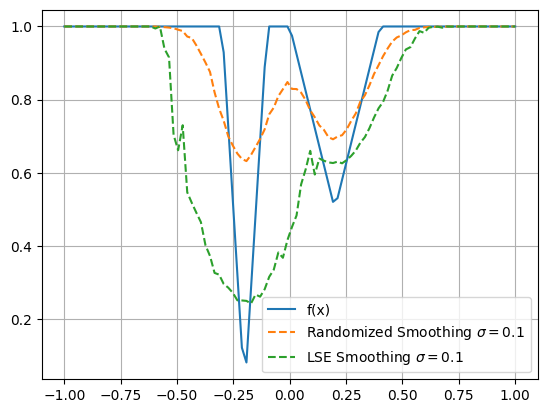

In [19]:
x = np.linspace(-1.0, 1.0, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
sigma = 0.1

smoothed_y = randomized_smoothing(x, sigma=sigma)
smoothed_y_lse = lse_smoothing(x, sigma=sigma, lam=0.1)
plt.plot(x, smoothed_y, "--", label=rf'Randomized Smoothing $\sigma={sigma}$')
plt.plot(x, smoothed_y_lse, "--", label=rf'LSE Smoothing $\sigma={sigma}$')
plt.legend()
plt.grid()

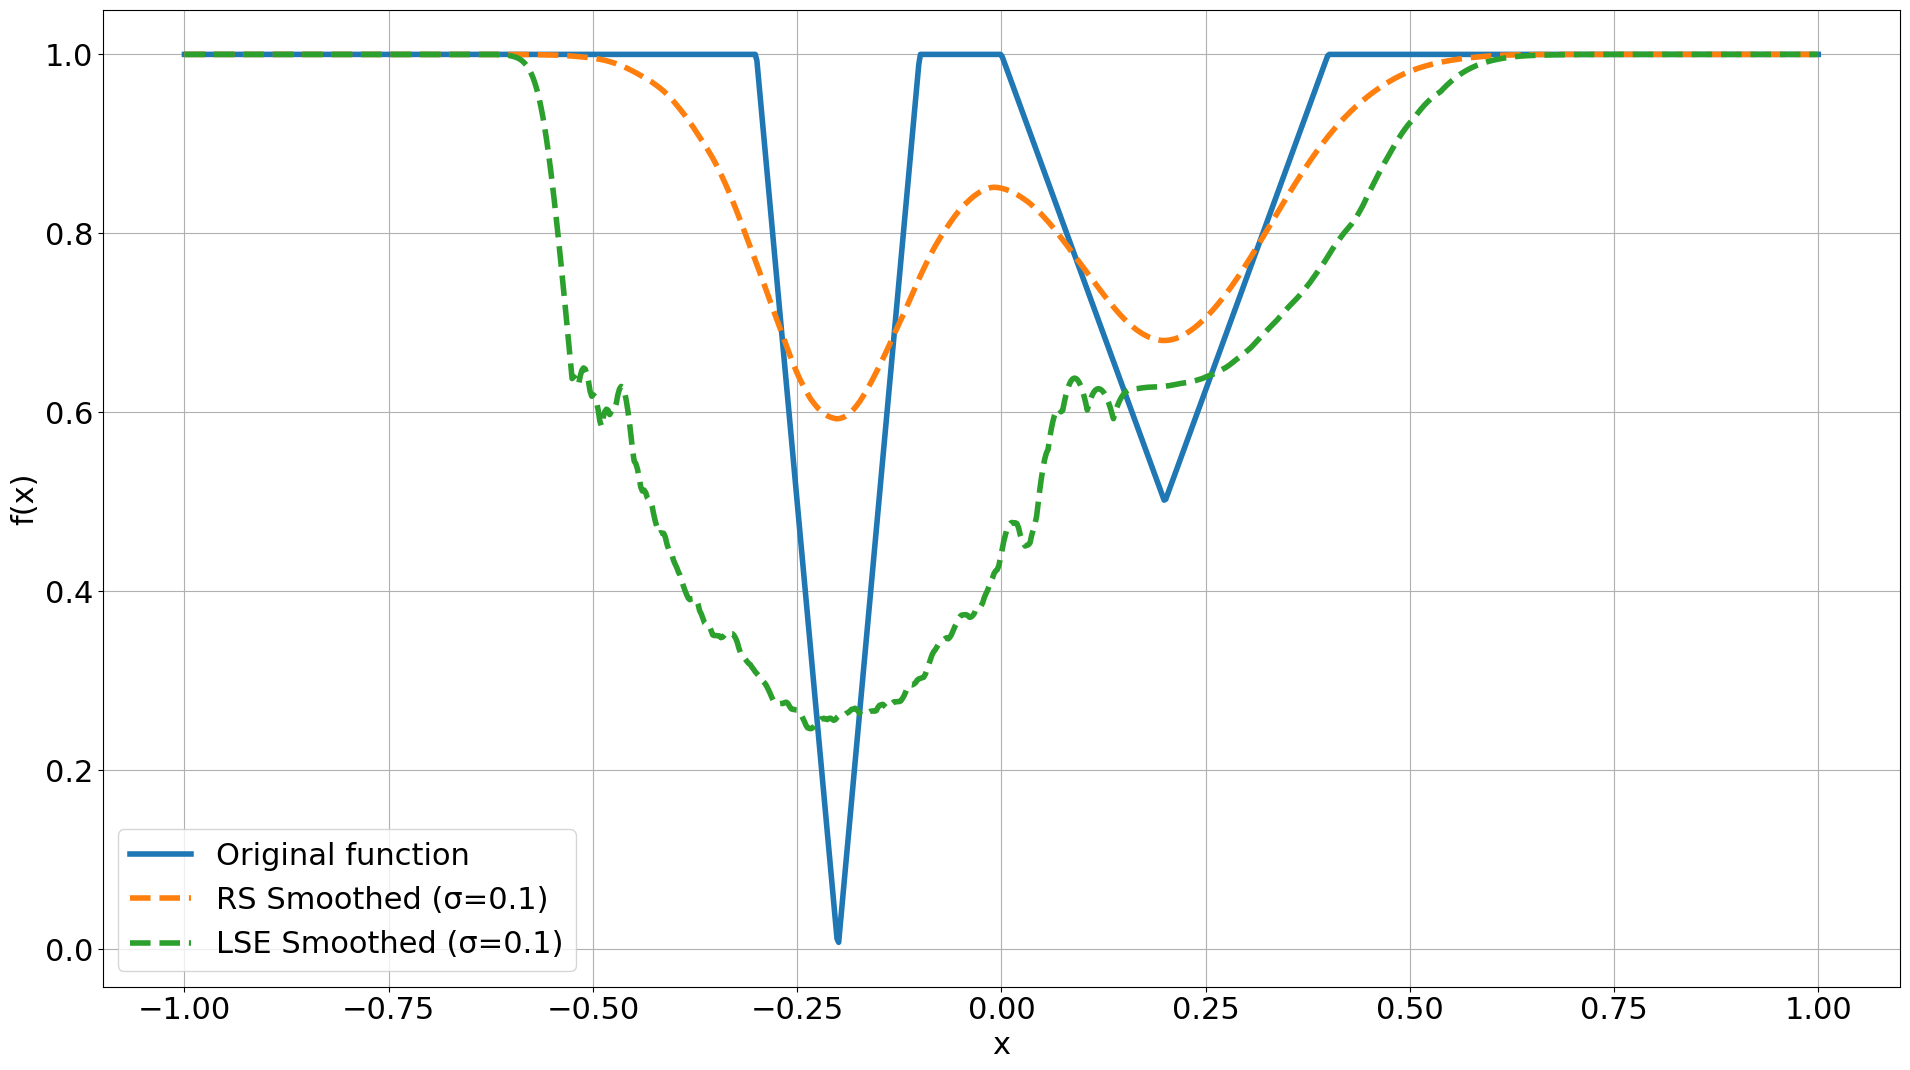

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


CAPSIZE     = 5
LABELSIZE   = 22
FONTSIZE    = 26
FIGSIZE    = (19.2,10.8)
FIGSIZE_SQ = (13.8,10.8)
LINEWIDTH   = 4

# PDF / PS font embedding for publication-quality output
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"]  = 42


def g(x):
    return np.min((np.abs(x), np.ones(x.shape)), axis=0)


def f(x):
    return g(10 * (x+0.2)) + 0.5 * g(5 * (x - 0.2)) - 0.5


# Randomized smoothing approximation
def rs_f(x, sigma=0.1, num_samples=10000):
    noise = np.random.normal(0, sigma, size=(num_samples, 1))  # Shape: [num_samples, 1]
    x_expanded = np.expand_dims(x, axis=0)                     # Shape: [1, N]
    samples = x_expanded + noise                               # Shape: [num_samples, N]
    return np.mean(f(samples), axis=0)


# log-sum-exp smoothing approximation
def lse_f(x, sigma=0.1, num_samples=10000, lambda_=0.1):
    noise = np.random.normal(0, sigma, size=(num_samples, 1))  # Shape: [num_samples, 1]
    x_expanded = np.expand_dims(x, axis=0)                     # Shape: [1, N]
    samples = x_expanded + noise                              # Shape: [num_samples, N]
    f_samples = f(samples)
    min_f = np.min(f_samples, axis=0)
    samples_exp = np.exp( - (f_samples - min_f) / lambda_ )              # Shape: [num_samples, N]
    sum = np.mean(samples_exp, axis=0)
    return - np.log(sum) * lambda_ + min_f

# Plot setup
x_up  = 1
x_low = -1
N_data = 1000
x_vals = np.linspace(x_low, x_up, N_data)
sigma = 0.1
num_samples = 1000

# Evaluate original function
f_vals = f(x_vals)

# Evaluate smoothed function
neutral_vals = rs_f(x_vals, sigma=sigma, num_samples=num_samples)
rs_vals = lse_f(x_vals, sigma=sigma, num_samples=num_samples, lambda_=0.1)
# ra_vals = lse_f(x_vals, sigma=sigma, num_samples=num_samples, lambda_=-0.1)



# Plotting
plt.figure(figsize=FIGSIZE)
plt.plot(x_vals, f_vals, label='Original function', linewidth=LINEWIDTH)
plt.plot(x_vals, neutral_vals, label=f'RS Smoothed (σ={sigma})', linestyle='--', linewidth=LINEWIDTH)
plt.plot(x_vals, rs_vals, label=f'LSE Smoothed (σ={sigma})', linestyle='--', linewidth=LINEWIDTH)

# plt.title('RS vs LSE', fontsize=FONTSIZE)
plt.xlabel('x', fontsize=LABELSIZE)
plt.ylabel('f(x)', fontsize=LABELSIZE)
plt.xticks(fontsize=LABELSIZE)
plt.yticks(fontsize=LABELSIZE)
plt.legend(fontsize=LABELSIZE)
plt.grid(True)
plt.tight_layout()
plt.show()